# We will be implementing the equation shown below:

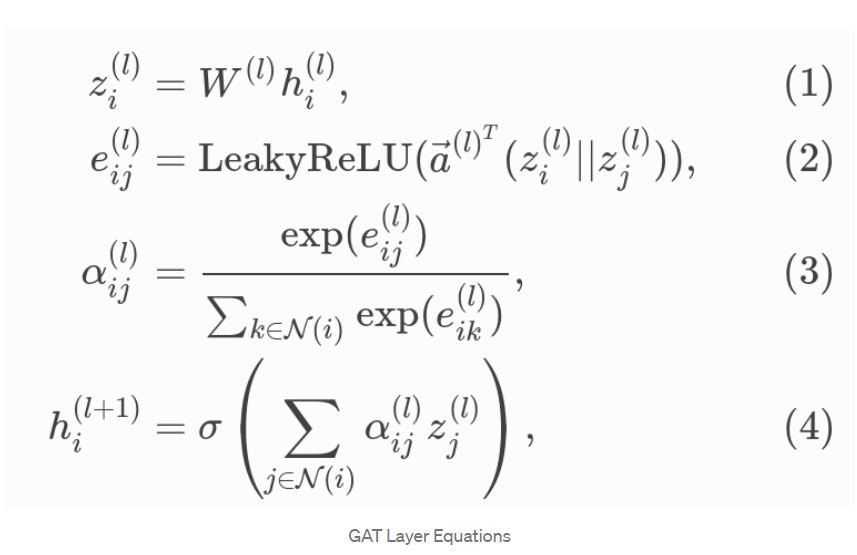

# Basic Function 

In [12]:
def leaky_relu(z):
    return np.where(z > 0, z, z * 0.01)

def softmax(z):
    if len(z.shape) > 1:
        # Softmax for matrix
        max_matrix = np.max(z, axis=0)
        stable_z = z - max_matrix
        e = np.exp(stable_z)
        a = e / np.sum(e, axis=0, keepdims=True)
    else:
        # Softmax for vector
        vector_max_value = np.max(z)
        a = (np.exp(z - vector_max_value)) / sum(np.exp(z - vector_max_value))

    assert a.shape == z.shape

    return a

#Graph and Weight matrix Creation

In [17]:
import numpy as np

print('\n\n----- One-hot vector representation of nodes. Shape(n,n)\n')
X = np.eye(5, 5)
n = X.shape[0]
np.random.shuffle(X)
print(X)

print('\n\n----- Embedding dimension\n')
emb = 3
print(emb)

# Weight matrix for representing each node
print('\n\n----- Weight Matrix. Shape(emb, n)\n')
W = np.random.uniform(-np.sqrt(1. / emb), np.sqrt(1. / emb), (emb, n))
print(W)

print('\n\n----- Adjacency Matrix (undirected graph). Shape(n,n)\n')
A = np.random.randint(2, size=(n, n))
np.fill_diagonal(A, 1)  
A = (A + A.T)
A[A > 1] = 1
print(A)



----- One-hot vector representation of nodes. Shape(n,n)

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


----- Embedding dimension

3


----- Weight Matrix. Shape(emb, n)

[[ 0.50474229 -0.50059408 -0.40538213 -0.32379983 -0.07172224]
 [ 0.04119947 -0.229676    0.15123996 -0.33394688  0.36968316]
 [ 0.35368438  0.46817059 -0.10540987  0.57543923 -0.08405894]]


----- Adjacency Matrix (undirected graph). Shape(n,n)

[[1 1 1 0 1]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 1]
 [1 0 0 1 1]]


# Eq 1
It is a linear transformation of the lower layer embedding h_i, and W is its learnable weight matrix. We can perform the linear transformation to achieve sufficient expressive power for node features starting from these ingredients. This step aims to transform the (one-hot encoded) input features into a low and dense representation.

In [16]:
# Representing each node as embedding

print('\n\n----- Linear Transformation. Shape(n, emb)\n')
z1 = X.dot(W.T)
print(z1)



----- Linear Transformation. Shape(n, emb)

[[-0.48185634  0.51056513 -0.41101085]
 [ 0.17338298  0.51262861 -0.41804655]
 [-0.00408507  0.2465736   0.5415529 ]
 [ 0.14901923 -0.18097168 -0.32846621]
 [-0.03909426  0.33596746  0.28201415]]


# Eq 2
The next operation is to introduce the self-attention coefficients for each edge. We concatenate the representation of the source node and the destination node's representation for representing edges. This concatenation process is enabled by the adjacency matrix A, which defines the relations between all the nodes in the graph.


In [22]:
# Self Attention representation for each edge
print('\n\n----- Concat hidden features to represent edges. Shape(len(emb.concat(emb)), number of edges)\n')

edge_coords = np.where(A==1)
h_src_nodes = z1[edge_coords[0]]
h_dst_nodes = z1[edge_coords[1]]

z2 = np.concatenate((h_src_nodes, h_dst_nodes), axis=1) ## (embedding1, embedding2) for every edge
print(z2)



----- Concat hidden features to represent edges. Shape(len(emb.concat(emb)), number of edges)

[[-0.48185634  0.51056513 -0.41101085 -0.48185634  0.51056513 -0.41101085]
 [-0.48185634  0.51056513 -0.41101085  0.17338298  0.51262861 -0.41804655]
 [-0.48185634  0.51056513 -0.41101085 -0.00408507  0.2465736   0.5415529 ]
 [-0.48185634  0.51056513 -0.41101085 -0.03909426  0.33596746  0.28201415]
 [ 0.17338298  0.51262861 -0.41804655 -0.48185634  0.51056513 -0.41101085]
 [ 0.17338298  0.51262861 -0.41804655  0.17338298  0.51262861 -0.41804655]
 [ 0.17338298  0.51262861 -0.41804655 -0.00408507  0.2465736   0.5415529 ]
 [-0.00408507  0.2465736   0.5415529  -0.48185634  0.51056513 -0.41101085]
 [-0.00408507  0.2465736   0.5415529   0.17338298  0.51262861 -0.41804655]
 [-0.00408507  0.2465736   0.5415529  -0.00408507  0.2465736   0.5415529 ]
 [ 0.14901923 -0.18097168 -0.32846621  0.14901923 -0.18097168 -0.32846621]
 [ 0.14901923 -0.18097168 -0.32846621 -0.03909426  0.33596746  0.28201415]
 [-

After this operation, we can introduce the attention coefficients and multiply them with the edge representation, resulting from the concatenation process. Finally, the Leaky Relu function is applied to the output of this product.

In [18]:
print('\n\n----- Attention coefficients. Shape(1, len(emb.concat(emb)))\n')
att = np.random.rand(1, z2.shape[1]) # getting the self attention weights of each edge
print(att)

print('\n\n----- Edge representations combined with the attention coefficients. Shape(1, number of edges)\n')
z2_att = z2.dot(att.T)
print(z2_att)

print('\n\n----- Leaky Relu. Shape(1, number of edges)')
e = leaky_relu(z2_att)
print(e)



----- Attention coefficients. Shape(1, len(emb.concat(emb)))

[[0.68728155 0.18276759 0.94172332 0.24743714 0.10642033 0.9670959 ]]


----- Edge representations combined with the attention coefficients. Shape(1, number of edges)

[[-1.08729626]
 [-0.07595149]
 [-0.32609959]
 [-0.48766499]
 [ 0.36813386]
 [ 0.08986952]
 [ 0.24541545]
 [ 1.10121429]
 [ 0.25220657]
 [ 0.85106619]
 [ 0.30898135]
 [-0.54002637]
 [-0.16226704]
 [ 0.84907773]
 [ 0.59892963]]


----- Leaky Relu. Shape(1, number of edges)
[[-1.08729626e-02]
 [-7.59514852e-04]
 [-3.26099591e-03]
 [-4.87664991e-03]
 [ 3.68133855e-01]
 [ 8.98695160e-02]
 [ 2.45415448e-01]
 [ 1.10121429e+00]
 [ 2.52206569e-01]
 [ 8.51066189e-01]
 [ 3.08981353e-01]
 [-5.40026373e-03]
 [-1.62267045e-03]
 [ 8.49077734e-01]
 [ 5.98929628e-01]]


# Eq 3
To make the coefficient easily comparable across different nodes, a softmax function is applied to all neighbors' contributions for every destination node.


In [24]:
e.reshape(-1,)

array([-1.08729626e-02, -7.59514852e-04, -3.26099591e-03, -4.87664991e-03,
        3.68133855e-01,  8.98695160e-02,  2.45415448e-01,  1.10121429e+00,
        2.52206569e-01,  8.51066189e-01,  3.08981353e-01, -5.40026373e-03,
       -1.62267045e-03,  8.49077734e-01,  5.98929628e-01])

In [26]:
print('\n\n----- Edge scores as matrix. Shape(n,n)\n')
e_matr = np.zeros(A.shape)
e_matr[edge_coords[0], edge_coords[1]] = e.reshape(-1,)
print(e_matr)

print('\n\n----- For each node, normalize the edge (or neighbor) contributions using softmax\n')
alpha0 = softmax(e_matr[:,0][e_matr[:,0] != 0]) 
alpha1 = softmax(e_matr[:,1][e_matr[:,1] != 0])
alpha2 = softmax(e_matr[:,2][e_matr[:,2] != 0])
alpha3 = softmax(e_matr[:,3][e_matr[:,3] != 0])
alpha4 = softmax(e_matr[:,4][e_matr[:,4] != 0])
alpha = np.concatenate((alpha0, alpha1, alpha2, alpha3, alpha4))
print(alpha)

print('\n\n----- Normalized edge score matrix. Shape(n,n)\n')
A_scaled = np.zeros(A.shape)
A_scaled[edge_coords[0], edge_coords[1]] = alpha.reshape(-1,)
print(A_scaled)



----- Edge scores as matrix. Shape(n,n)

[[-1.08729626e-02 -7.59514852e-04 -3.26099591e-03  0.00000000e+00
  -4.87664991e-03]
 [ 3.68133855e-01  8.98695160e-02  2.45415448e-01  0.00000000e+00
   0.00000000e+00]
 [ 1.10121429e+00  2.52206569e-01  8.51066189e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.08981353e-01
  -5.40026373e-03]
 [-1.62267045e-03  0.00000000e+00  0.00000000e+00  8.49077734e-01
   5.98929628e-01]]


----- For each node, normalize the edge (or neighbor) contributions using softmax

[0.15359037 0.22436989 0.46702202 0.15501772 0.29562163 0.32366512
 0.38071325 0.21588387 0.27683373 0.50728239 0.36816516 0.63183484
 0.2611959  0.26105917 0.47774493]


----- Normalized edge score matrix. Shape(n,n)

[[0.15359037 0.22436989 0.46702202 0.         0.15501772]
 [0.29562163 0.32366512 0.38071325 0.         0.        ]
 [0.21588387 0.27683373 0.50728239 0.         0.        ]
 [0.         0.         0.         0.36816516 0.63183

# Eq 4
The embeddings from neighbors are incorporated into the destination node, scaled by the attention scores.


In [27]:
print('\n\nNeighborhood aggregation (GCN) scaled with attention scores (GAT). Shape(n, emb)\n')
ND_GAT = A_scaled.dot(z1)
print(ND_GAT)



Neighborhood aggregation (GCN) scaled with attention scores (GAT). Shape(n, emb)

[[-0.0430747   0.36067252  0.13970995]
 [-0.08788437  0.41072793 -0.05063442]
 [-0.05809904  0.37721811  0.07026025]
 [ 0.03016257  0.14564848  0.05725655]
 [-0.10563315  0.24661995 -0.05837263]]
